<a id='top'></a>

# Complex vibration modes

Complex vibration modes arise in experimental research and numerical simulations with non proportional damping. In such cases the eigenproblem is [nonlinear](http://en.wikipedia.org/wiki/Nonlinear_eigenproblem), thus requiring additional work in order to obtain the vibration frequencies and mode shapes of the dynamic system.

The solution to the free vibration response of the dynamic equilibrium equation involves some form of linearization of the [quadratic eigenvalue problem](http://en.wikipedia.org/wiki/Quadratic_eigenvalue_problem) it yields. For more information on this subject see for example [this report](http://prod.sandia.gov/techlib/access-control.cgi/2007/072072.pdf).

## Table of contents

[Preamble](#Preamble)

[Dynamic equilibrium equation](#Dynamic-equilibrium-equation)

[State space formulation](#State-space-formulation)

[Dynamic system setup](#Dynamic-system-setup)

[Undamped system](#Undamped-system)

[Proportionally damped system](#Proportionally-damped-system)

[Non proportionally damped system](#Non-proportionally-damped-system)

[Conclusions](#Conclusions)

[Odds and ends](#Odds-and-ends)

## Preamble

We will start by setting up the computational environment for this notebook. Furthermore, we will need numpy and scipy for the numerical simulations and matplotlib for the plots:

In [1]:
import sys
import numpy as np
import scipy as sp
import matplotlib as mpl

print('System: {}'.format(sys.version))
print('numpy version: {}'.format(np.__version__))
print('scipy version: {}'.format(sp.__version__))
print('matplotlib version: {}'.format(mpl.__version__))

System: 3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
numpy version: 1.11.2
scipy version: 0.18.1
matplotlib version: 1.5.3


We will also need a couple of specific modules and a litle "IPython magic" to show the plots:

In [2]:
from numpy import linalg as LA
import matplotlib.pyplot as plt

%matplotlib inline

[Back to top](#top)

## Dynamic equilibrium equation

In structural dynamics the second order differential dynamic equilibrium equation can be written in terms of generalized coordinates (d[isplacement]) and their first (v[elocity]) and second (a[cceleration]) time derivatives:

\begin{equation}
\mathbf{M} \times \mathbf{a(t)} + \mathbf{C} \times \mathbf{v(t)} + \mathbf{K} \times \mathbf{d(t)} = \mathbf{F(t)}
\end{equation}

where:

> $\mathbf{M}$ is the mass matrix  
> $\mathbf{C}$ is the damping matrix  
> $\mathbf{K}$ is the stiffness matrix  
> $\mathbf{a(t)}$ is the acceleration vector  
> $\mathbf{v(t)}$ is the velocity vector  
> $\mathbf{d(t)}$ is the displacement vector  
> $\mathbf{F(t)}$ is the force input vector  

Considering a dynamic system with $NDOF$ is the number of generalized degrees of freedom, the vectors will have dimensions of $NDOF \times 1$ and the matrices $NDOF \times NDOF$.

When the system is undamped, the damping matrix will be null. In this case the eigenproblem is linear:

\begin{equation}
\left[ -\mathbf{M} \times \mathbf{\omega^2} + \mathbf{K} \right] \times \mathbf{v} = \mathbf{0}
\end{equation}

In a proportionally damped system, the damping matrix is proportional to the mass and stiffness matrices:

\begin{equation}
\mathbf{C} = \alpha \times \mathbf{M} + \beta \times \mathbf{K}
\end{equation}

where $\alpha$ and $\beta$ are mass and stiffness proportionality coefficients. These are typically very small positive numbers. The resulting eigenproblem is still linear because the damping matrix can be decomposed by the modal vectors.

In a system with non proportional damping, the damping matrix will not be proportional neither to the mass nor to the stiffness matrices.

[Back to top](#top)

## Dynamic system setup

In this example we will use the folowing mass and stiffness matrices:

In [3]:
MM = np.matrix(np.diag([1., 2.]))
print(MM)

[[ 1.  0.]
 [ 0.  2.]]


In [4]:
KK = np.matrix([[20., -10.], [-10., 10.]])
print(KK)

[[ 20. -10.]
 [-10.  10.]]


We will also setup two damping matrices, one proportional to the mass and stiffness matrices (C1) and the other non proportional (C2):

In [5]:
C1 = 0.1*MM+0.04*KK
print(C1)

[[ 0.9 -0.4]
 [-0.4  0.6]]


In [6]:
C2 = np.matrix([[0.1, 0.2], [0.2, 0.2]])
print(C2)

[[ 0.1  0.2]
 [ 0.2  0.2]]


[Back to top](#top)

## Undamped system

In the undamped system the damping matrix is all zeros and therefore the eigenproblem is a linear one as it involves only the mass and stiffness matrices:

In [7]:
W2, F1 = LA.eig(LA.solve(MM,KK)) # eigenanalysis
ix = np.argsort(np.absolute(W2)) # sort eigenvalues in ascending order
W2 = W2[ix] # sorted eigenvalues
F1 = F1[:,ix] # sorted eigenvectors
print(np.round_(W2, 4))
print(np.round_(F1, 4))

[  2.1922  22.8078]
[[ 0.4896  0.9628]
 [ 0.8719 -0.2703]]


The angular frequencies are computed as the square root of the eigenvalues:

In [8]:
print(np.sqrt(W2))

[ 1.48062012  4.77574749]


The modal vectors, the columns of the modal matrix, have unit norm:

In [9]:
print(LA.norm(F1, axis=0))

[ 1.  1.]


Contrary to what is normaly done, we will visualize the modal vectors in a polar plot of the corresponding amplitudes and angles of equivalent complex values:

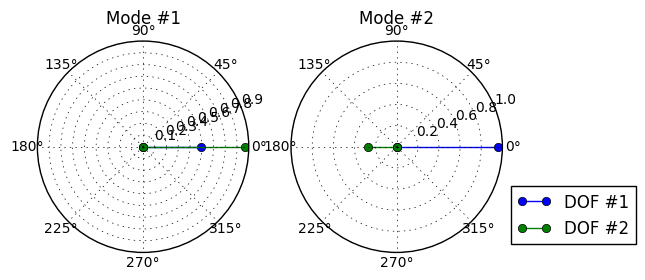

In [10]:
fig, ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))
for mode in range(2):
    ax[mode].set_title('Mode #{}'.format(mode+1))
    for dof in range(2):
        r = np.array([0, np.absolute(F1[dof,mode])])
        t = np.array([0, np.angle(F1[dof,mode])])
        ax[mode].plot(t, r, 'o-', label='DOF #{}'.format(dof+1))
plt.legend(loc='lower left', bbox_to_anchor=(1., 0.))
plt.show()

[Back to top](#top)

## Proportionally damped system



This damping matrix is orthogonal because the mass and stiffness matrices are also orthogonal:

In [11]:
print(np.round_(F1.T*C1*F1, 4))

[[ 0.3304  0.    ]
 [ 0.      1.0863]]


The system and input matrices are the following:

In [12]:
A = np.bmat([[np.zeros_like(MM), MM], [MM, C1]])
print(A)

[[ 0.   0.   1.   0. ]
 [ 0.   0.   0.   2. ]
 [ 1.   0.   0.9 -0.4]
 [ 0.   2.  -0.4  0.6]]


In [13]:
B = np.bmat([[MM, np.zeros_like(MM)], [np.zeros_like(MM), -KK]])
print(B)

[[  1.   0.   0.   0.]
 [  0.   2.   0.   0.]
 [  0.   0. -20.  10.]
 [  0.   0.  10. -10.]]


The eigenanalysis yields the eigenvalues and eigenvectors:

In [14]:
w1, v1 = LA.eig(LA.solve(A,B))
ix = np.argsort(np.absolute(w1))
w1 = w1[ix]
v1 = v1[:,ix]
print(np.round_(w1, 4))
print(np.round_(v1, 4))

[-0.0938+1.4776j -0.0938-1.4776j -0.5062+4.7488j -0.5062-4.7488j]
[[ 0.4058-0.j      0.4058+0.j      0.9423+0.j      0.9423-0.j    ]
 [ 0.7226+0.j      0.7226-0.j     -0.2646-0.j     -0.2646+0.j    ]
 [-0.0174-0.2735j -0.0174+0.2735j -0.0209-0.1962j -0.0209+0.1962j]
 [-0.0309-0.487j  -0.0309+0.487j   0.0059+0.0551j  0.0059-0.0551j]]


As we can see, the eigenvalues come in complex conjugate pairs. Let us take only the ones in the [upper half-plane](http://en.wikipedia.org/wiki/Upper_half-plane):

In [15]:
print(np.round_(w1[::2], 4))

[-0.0938+1.4776j -0.5062+4.7488j]


These complex eigenvalues can be decomposed into angular frequency and damping coefficient:

In [16]:
zw = -w1.real # damping coefficient time angular frequency
wD = w1.imag # damped angular frequency
zn = 1./np.sqrt(1.+(wD/-zw)**2) # the minus sign is formally correct!
wn = zw/zn # undamped angular frequency
print('Angular frequency: {}'.format(wn[[0,2]]))
print('Damping coefficient: {}'.format(zn[[0,2]]))

Angular frequency: [ 1.48062012  4.77574749]
Damping coefficient: [ 0.06338204  0.10598452]


The columns of the modal matrix, the modal vectors, also come in conjugate pairs, each vector having unit norm:

In [17]:
print(LA.norm(v1[:,::2], axis=0))

[ 1.  1.]


Moreover, the modal matrix is composed of four blocks, each with $NDOF \times NDOF$ dimension. Some column reordering is necessary in order to match both modal matrices:

In [18]:
AA = v1[:2,[0,2]]
AB = AA.conjugate()
BA = np.multiply(AA,w1[[0,2]])
BB = BA.conjugate()
v1_new = np.bmat([[AA, AB], [BA, BB]])
print(np.round_(v1_new[:,[0,2,1,3]], 4))

[[ 0.4058-0.j      0.4058+0.j      0.9423+0.j      0.9423-0.j    ]
 [ 0.7226+0.j      0.7226-0.j     -0.2646-0.j     -0.2646+0.j    ]
 [-0.0381+0.5996j -0.0381-0.5996j -0.4770+4.475j  -0.4770-4.475j ]
 [-0.0678+1.0677j -0.0678-1.0677j  0.1339-1.2565j  0.1339+1.2565j]]


We will visualize again the complex valued modal vectors with a polar plot of the corresponding amplitudes and angles:

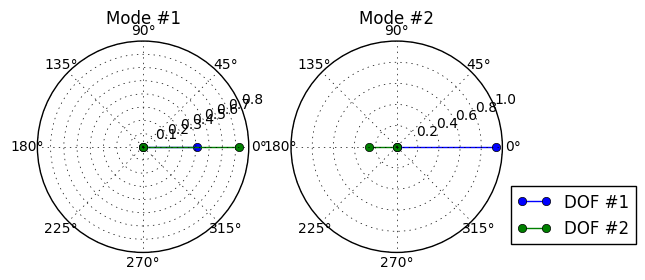

In [19]:
fig, ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))
for mode in range(2):
    ax[mode].set_title('Mode #{}'.format(mode+1))
    for dof in range(2):
        r = np.array([0, np.absolute(v1[dof,2*mode])])
        t = np.array([0, np.angle(v1[dof,2*mode])])
        ax[mode].plot(t, r, 'o-', label='DOF #{}'.format(dof+1))
plt.legend(loc='lower left', bbox_to_anchor=(1., 0.))
plt.show()

[Back to top](#top)

## Non proportionally damped system

In non proportionally damped systems the damping matrix is not proportional neither to the mass matrix nor the stiffness matrix.

Non proportinal damping carries the fact that the damping matrix is not orthogonal anymore:

In [20]:
print(np.round_(F1.T*C2*F1, 4))

[[ 0.3468  0.1414]
 [ 0.1414  0.0032]]


The system and input matrices are the following:

In [21]:
A = np.bmat([[np.zeros_like(MM), MM], [MM, C2]])
print(A)

[[ 0.   0.   1.   0. ]
 [ 0.   0.   0.   2. ]
 [ 1.   0.   0.1  0.2]
 [ 0.   2.   0.2  0.2]]


In [22]:
B = np.bmat([[MM, np.zeros_like(MM)], [np.zeros_like(MM), -KK]])
print(B)

[[  1.   0.   0.   0.]
 [  0.   2.   0.   0.]
 [  0.   0. -20.  10.]
 [  0.   0.  10. -10.]]


The eigenanalysis yields the eigenvalues and eigenvectors of the system matrix:

In [23]:
w2, v2 = LA.eig(LA.solve(A,B))
ix = np.argsort(np.absolute(w2))
w2 = w2[ix]
v2 = v2[:,ix]
print(np.round_(w2, 4))
print(np.round_(v2, 4))

[-0.0986+1.4777j -0.0986-1.4777j -0.0014+4.7745j -0.0014-4.7745j]
[[  4.06300000e-01-0.0087j   4.06300000e-01+0.0087j  -9.42000000e-01+0.j
   -9.42000000e-01-0.j    ]
 [  7.22300000e-01+0.j       7.22300000e-01-0.j       2.65100000e-01-0.0184j
    2.65100000e-01+0.0184j]
 [ -2.41000000e-02-0.2733j  -2.41000000e-02+0.2733j
    1.00000000e-04+0.1973j   1.00000000e-04-0.1973j]
 [ -3.25000000e-02-0.4866j  -3.25000000e-02+0.4866j
   -3.90000000e-03-0.0555j  -3.90000000e-03+0.0555j]]


As we can see, the eigenvalues come in complex conjugate pairs. Again, let us take only the ones in the [upper half-plane](http://en.wikipedia.org/wiki/Upper_half-plane):

In [24]:
print(np.round_(w2[[0,2]], 4))

[-0.0986+1.4777j -0.0014+4.7745j]


These complex eigenvalues can be decomposed into angular frequency and damping coefficient much like in the propotional damping case:

In [25]:
zw = -w2.real # damping coefficient times angular frequency
wD = w2.imag # damped angular frequency
zn = 1./np.sqrt(1.+(wD/-zw)**2) # the minus sign is formally correct!
wn = zw/zn # undamped angular frequency
print('Angular frequency: {}'.format(wn[[0,2]]))
print('Damping coefficient: {}'.format(zn[[0,2]]))

Angular frequency: [ 1.48099973  4.77452335]
Damping coefficient: [ 0.06655163  0.00030098]


Again, the columns of the modal matrix, the modal vectors, come in conjugate pairs, and each vector has unit norm:

In [26]:
print(LA.norm(v2[:,[0,2]], axis=0))

[ 1.  1.]


Moreover, the modal matrix is composed of four blocks, each with $NDOF \times NDOF$ dimension. Some column reordering is necessary in order to match both modal matrices:

In [27]:
AA = v2[:2,[0,2]]
AB = AA.conjugate()
BA = np.multiply(AA,w2[[0,2]])
BB = BA.conjugate()
v2_new = np.bmat([[AA, AB], [BA, BB]])
print(np.round_(v2_new[:,[0,2,1,3]], 4))

[[ 0.4063-0.0087j  0.4063+0.0087j -0.9420+0.j     -0.9420-0.j    ]
 [ 0.7223+0.j      0.7223-0.j      0.2651-0.0184j  0.2651+0.0184j]
 [-0.0272+0.6012j -0.0272-0.6012j  0.0014-4.4975j  0.0014+4.4975j]
 [-0.0712+1.0673j -0.0712-1.0673j  0.0873+1.266j   0.0873-1.266j ]]


Once more we will visualize the complex valued modal vectors through a polar plot of the corresponding amplitudes and angles:

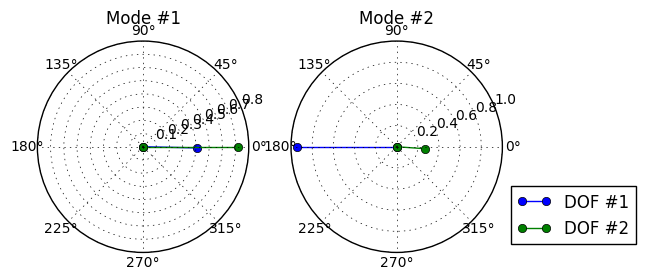

In [28]:
fig, ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))
for mode in range(2):
    ax[mode].set_title('Mode #{}'.format(mode+1))
    for dof in range(2):
        r = np.array([0, np.absolute(v2[dof,2*mode])])
        t = np.array([0, np.angle(v2[dof,2*mode])])
        ax[mode].plot(t, r, 'o-', label='DOF #{}'.format(dof+1))
plt.legend(loc='lower left', bbox_to_anchor=(1., 0.))
plt.show()

[Back to top](#top)

## Conclusions

Several conclusion can be drawn from this very simple example. First of all, damping changes the vibration frequencies and mode shapes. Furthermore, the polar plots show clearly that:

1. In the undamped system the vibration modes are fully "orthogonal";
2. In the proportionally damped system the vibration modes are no longer "orthogonal";
3. In the non proportionally damped system each DOF has a different phase angle.

[Back to top](#top)

## Odds and ends

This notebook was created by Paulo Xavier Candeias.

[Back to top](#top)